In [3]:
#MY SCRAP PAPER NOTEBOOK, not intended for others
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pykalman import KalmanFilter
import os

In [1]:
dir_in = 'D:\\arxeia\\AI_VU\\THESIS_internship\\3-experimental\\data\\allSensors_allPPs'
os.chdir(dir_in)

raw_df = pd.read_csv('all_data_4pps.csv')
print(raw_df.shape)
raw_df.head()

NameError: name 'pd' is not defined

In [4]:
raw_df.describe(include='all')


,pp_id,condition,ts(sec),frame,success,confidence,AU1_InnerBrowRaiser,AU2_OuterBrowRaiser,AU4_BrowLowerer,AU5_UpperLipRaiser,...,move_dist,move_duration,move_speed,scroll_dur,keyPress,press_dur,backsp,backsp_dur,pause_dur,pause_rate
count,120,120,120.000000,120.00000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,...,109.000000,109.000000,109.000000,66.000000,120.000000,118.000000,120.000000,118.000000,118.000000,118.000000
unique,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,pp02,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,60,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,932.578083,27900.00000,0.963833,0.944722,0.262596,0.119441,0.338647,0.077794,...,10.048084,0.022754,1228.203029,0.426030,48.716667,0.412259,48.716667,0.096042,3.621357,6.035595
std,NaN,NaN,522.968609,15645.11898,0.068127,0.061016,0.181189,0.084139,0.143982,0.053842,...,3.502247,0.003711,429.590644,0.289391,41.279572,0.145594,41.279572,0.126667,7.741543,12.902572
min,NaN,NaN,60.107000,1800.00000,0.632222,0.655522,0.012756,0.007472,0.083206,0.003956,...,3.153472,0.012578,380.144579,0.085762,0.000000,0.113102,0.000000,0.000000,0.346265,0.577108
25%,NaN,NaN,481.427250,14400.00000,0.954583,0.934361,0.152499,0.054831,0.236497,0.038849,...,7.452377,0.020523,917.974936,0.214136,16.000000,0.300460,16.000000,0.026345,0.789734,1.316224
50%,NaN,NaN,932.564000,27900.00000,0.999722,0.975542,0.235547,0.106203,0.334667,0.065944,...,9.982158,0.022330,1217.059378,0.320410,37.000000,0.371503,37.000000,0.058823,1.783913,2.973188
75%,NaN,NaN,1383.517750,41400.00000,1.000000,0.979458,0.345576,0.164333,0.418849,0.102932,...,12.465211,0.024323,1505.729771,0.537305,71.250000,0.493699,71.250000,0.124244,3.786115,6.310192


In [4]:
raw_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pp_id                     120 non-null    object 
 1   condition                 120 non-null    object 
 2   ts(sec)                   120 non-null    float64
 3   frame                     120 non-null    float64
 4   success                   120 non-null    float64
 5   confidence                120 non-null    float64
 6   AU1_InnerBrowRaiser       120 non-null    float64
 7   AU2_OuterBrowRaiser       120 non-null    float64
 8   AU4_BrowLowerer           120 non-null    float64
 9   AU5_UpperLipRaiser        120 non-null    float64
 10  AU6_CheekRaiser           120 non-null    float64
 11  AU7_LidTightener          120 non-null    float64
 12  AU9_NoseWringler          120 non-null    float64
 13  AU10_UpperLipRaiser       120 non-null    float64
 14  AU12_LipCo

In [5]:
raw_df.isna().sum()

pp_id                        0
condition                    0
ts(sec)                      0
frame                        0
success                      0
confidence                   0
AU1_InnerBrowRaiser          0
AU2_OuterBrowRaiser          0
AU4_BrowLowerer              0
AU5_UpperLipRaiser           0
AU6_CheekRaiser              0
AU7_LidTightener             0
AU9_NoseWringler             0
AU10_UpperLipRaiser          0
AU12_LipCornerPuller         0
AU14_Dimpler                 0
AU15_LipCornerDepressonr     0
AU17_ChinRaiser              0
AU20_LipStretcher            0
AU23_LipTightener            0
AU25_LipsPart                0
AU26_JawDrop                 0
AU45_BlinkInt                0
AUc45_BlinkRate              0
AUc28_LipSuck                0
headOrient_x                 0
headOrient_y                 0
headOrient_z                 0
gazeCenter                   0
gazeUp                       0
gazeDown                     0
gazeRight                    0
gazeLeft

### selecting data of each pp in each cond

In [10]:
df = raw_df.copy()

In [4]:
### separated the data in base of person and blok [P=Person][condition 0-n/1-S][1=data] 
split_df=[]
pp_df = list(df.groupby("pp_id"))
#pp_df is a list of tuples. pp_df[0] is the first tuple/ holds (ppid, neutral n stress for 1st pp)
#pp_df[0][0]: PPnr (str) and pp_df[0][1]: data (df)
for pp in pp_df:
    split_df.append(list(pp[1].groupby("condition"))) 

In [31]:
# type(split_df[0][0])
# split_df[0][1][1]
#  (split_df[0])#--> has for pp2: (N, neutral data)(S,stress data)
# len(split_df[0])#---> = pp numbers (2 for test, should be 20 for full data)
# len(split_df[0][0])


tuple

### fill in missing values by interpolation (function)

In [4]:
def interpolate_missing(df, col):
        # df = df2 #so i can loop over pp dfs outside this function. check it
        df[col] = df[col].interpolate()
        # And fill the initial data points if needed:
        df[col] = df[col].fillna(method='bfill')
        return df

In [9]:
# 2CHECK IF MISSING VALUE INTERPOLATION WORKED
for pp_id in range(len(split_df[0])): #LOOPs OVER PP NUMBER
    for cond in [0,1]:
        cond_df = split_df[pp_id][cond][1]
        print(cond_df.isna().sum().sum())

0
0
0
0


In [73]:
# split_df[0][0][1].isna().sum().sum()
pp_df[0][1].isna().sum().sum()

87

filling in NAs in split df

In [71]:
for pp_id in range(len(split_df[0])): #LOOPs OVER PP NUMBER
    for cond in [0,1]:
        cond_df = split_df[pp_id][cond][1]
        for col in ['duration', 'move_dist', 'move_duration', 'move_speed', 'scroll_dur', 'press_dur', 'backsp_dur', 'pause_dur', 'pause_rate']:
            cond_df = interpolate_missing(cond_df, col)

trying to fill NAs in pp_df

In [7]:
for pp_id in range(len(pp_df)):
    for col in ['duration', 'move_dist', 'move_duration', 'move_speed', 'scroll_dur', 'press_dur', 'backsp_dur', 'pause_dur', 'pause_rate']:
        pp[pp_id][1] = interpolate_missing(pp[pp_id][1], col)

NameError: name 'pp_df' is not defined

fill NAs in df (not pp-wise)

In [8]:
for col in ['duration', 'move_dist', 'move_duration', 'move_speed', 'scroll_dur', 'press_dur', 'backsp_dur', 'pause_dur', 'pause_rate']:
    df = interpolate_missing(df,col)

In [88]:
type(pp_df[0][1].index)

pandas.core.indexes.numeric.Int64Index

In [84]:
# for pp_id in range(len(pp_df)):
#     for pp in pp_df:
#         for col in num_cols:
#             temp = list(pp[1].groupby("condition"))
#             print(temp[0][1])


   pp_id condition   ts(sec)    frame   success  confidence  \
0   pp02         N    60.163   1800.0  1.000000    0.979333   
1   pp02         N   120.360   3600.0  1.000000    0.975500   
2   pp02         N   180.556   5400.0  1.000000    0.975056   
3   pp02         N   240.753   7200.0  1.000000    0.977056   
4   pp02         N   300.950   9000.0  1.000000    0.975194   
5   pp02         N   361.146  10800.0  1.000000    0.979111   
6   pp02         N   421.343  12600.0  1.000000    0.980000   
7   pp02         N   481.540  14400.0  1.000000    0.979667   
8   pp02         N   541.736  16200.0  1.000000    0.977083   
9   pp02         N   601.933  18000.0  1.000000    0.978667   
10  pp02         N   662.130  19800.0  1.000000    0.975622   
11  pp02         N   722.326  21600.0  1.000000    0.980000   
12  pp02         N   782.523  23400.0  1.000000    0.979750   
13  pp02         N   842.720  25200.0  1.000000    0.976306   
14  pp02         N   902.916  27000.0  1.000000    0.97

Text(0, 0.5, 'percentage')

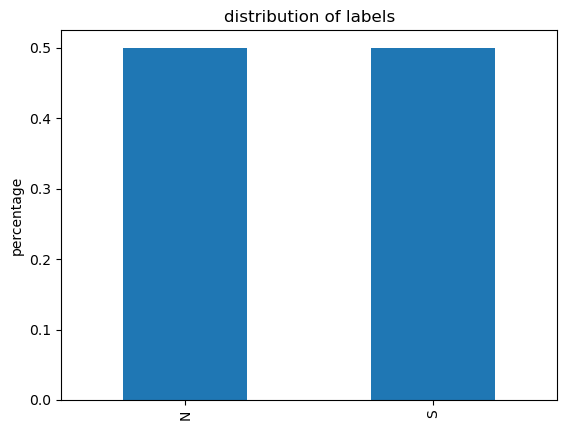

In [20]:
(df['condition'].value_counts()/df.shape[0]).plot(kind='bar',  title = 'distribution of labels')
plt.ylabel('percentage')
# plt.title('distribution of labels')


 COrrelation matrix and cluster map: 


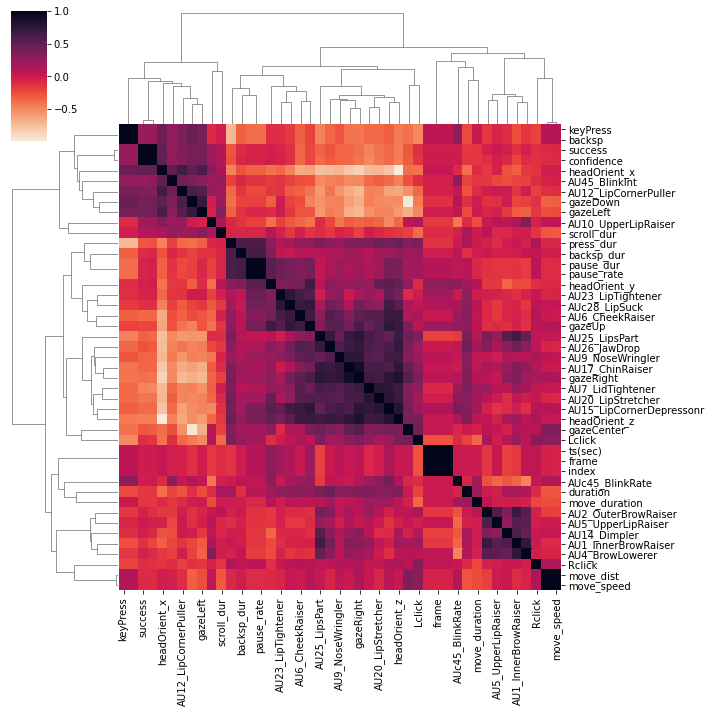

In [26]:
print('\n COrrelation matrix and cluster map: ')
sns.clustermap(df.corr(), cmap="rocket_r", yticklabels=True)

In [36]:
type(a)

pandas.core.series.Series

In [16]:
df[num_cols].corr().unstack().sort_values(ascending= False).drop_duplicates()



pause_rate                pause_dur              1.000000
AU1_InnerBrowRaiser       AU1_InnerBrowRaiser    1.000000
move_speed                move_dist              0.995125
AU17_ChinRaiser           gazeRight              0.899154
headOrient_z              gazeRight              0.835188
                                                   ...   
AU15_LipCornerDepressonr  headOrient_x          -0.767158
headOrient_x              AU17_ChinRaiser       -0.791537
                          gazeRight             -0.850196
gazeDown                  gazeCenter            -0.944370
headOrient_z              headOrient_x          -0.981892
Length: 735, dtype: float64

#### defining col groupd

In [9]:
auc_cols = ['AU1_InnerBrowRaiser', 'AU2_OuterBrowRaiser', 'AU4_BrowLowerer',
       'AU5_UpperLipRaiser', 'AU6_CheekRaiser', 'AU7_LidTightener',
       'AU9_NoseWringler', 'AU10_UpperLipRaiser', 'AU12_LipCornerPuller',
       'AU14_Dimpler', 'AU15_LipCornerDepressonr', 'AU17_ChinRaiser',
       'AU20_LipStretcher', 'AU23_LipTightener', 'AU25_LipsPart',
       'AU26_JawDrop', 'AU45_BlinkInt', 'AUc45_BlinkRate', 'AUc28_LipSuck']
head_gaze_cols = ['headOrient_x', 'headOrient_y', 'headOrient_z', 'gazeCenter', 'gazeUp',
       'gazeDown', 'gazeRight', 'gazeLeft']
typing_cols = ['duration',
       'Rclick', 'Lclick', 'move_dist', 'move_duration', 'move_speed',
       'scroll_dur', 'keyPress', 'press_dur', 'backsp', 'backsp_dur',
       'pause_dur', 'pause_rate']
# num_cols = list(df.select_dtypes(include='float').columns)
num_cols = ['AU1_InnerBrowRaiser', 'AU2_OuterBrowRaiser', 'AU4_BrowLowerer', 'AU5_UpperLipRaiser', 'AU6_CheekRaiser', 'AU7_LidTightener', 'AU9_NoseWringler', 'AU10_UpperLipRaiser', 'AU12_LipCornerPuller',
 'AU14_Dimpler','AU15_LipCornerDepressonr', 'AU17_ChinRaiser', 'AU20_LipStretcher', 'AU23_LipTightener', 'AU25_LipsPart', 'AU26_JawDrop', 'AU45_BlinkInt', 'AUc45_BlinkRate', 'AUc28_LipSuck',
 'headOrient_x', 'headOrient_y', 'headOrient_z', 'gazeCenter', 'gazeUp', 'gazeDown', 'gazeRight', 'gazeLeft', 'duration', 'Rclick', 'Lclick', 'move_dist', 'move_duration', 'move_speed',
 'scroll_dur', 'keyPress', 'press_dur', 'backsp', 'backsp_dur', 'pause_dur', 'pause_rate']

40

In [114]:
len(num_cols)

40

In [56]:
df.columns

Index(['pp_id', 'condition', 'ts(sec)', 'frame', 'success', 'confidence',
       'AU1_InnerBrowRaiser', 'AU2_OuterBrowRaiser', 'AU4_BrowLowerer',
       'AU5_UpperLipRaiser', 'AU6_CheekRaiser', 'AU7_LidTightener',
       'AU9_NoseWringler', 'AU10_UpperLipRaiser', 'AU12_LipCornerPuller',
       'AU14_Dimpler', 'AU15_LipCornerDepressonr', 'AU17_ChinRaiser',
       'AU20_LipStretcher', 'AU23_LipTightener', 'AU25_LipsPart',
       'AU26_JawDrop', 'AU45_BlinkInt', 'AUc45_BlinkRate', 'AUc28_LipSuck',
       'headOrient_x', 'headOrient_y', 'headOrient_z', 'gazeCenter', 'gazeUp',
       'gazeDown', 'gazeRight', 'gazeLeft', 'index', 'ts', 'duration',
       'Rclick', 'Lclick', 'move_dist', 'move_duration', 'move_speed',
       'scroll_dur', 'keyPress', 'press_dur', 'backsp', 'backsp_dur',
       'pause_dur', 'pause_rate'],
      dtype='object')

<Axes: >

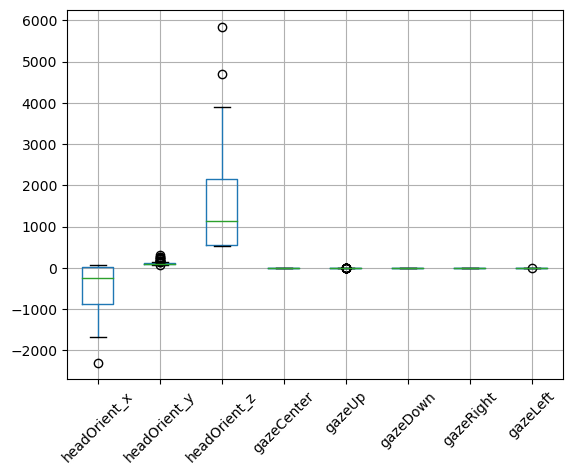

In [38]:
# df[head_gaze_cols].boxplot(by='pp_id')
df[head_gaze_cols].boxplot(rot=45)


# to plot every col as sub plot
# numerical_columns = df.select_dtypes(include='number').columns
# num_cols = len(numerical_columns)

# fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(12, 6))

# for i, col in enumerate(numerical_columns):
#     df.boxplot(column=col, ax=axes[i])
#     axes[i].set_title(col)

# # plt.tight_layout()
# plt.show()



### Kalman filetr to detect and impute outliers (function)

In [11]:
   # Very simple Kalman filter: fill missing values and remove outliers for single attribute.
    # We assume a very simple transition matrix, namely simply a [[1]]. It
    # is however still useful as it is able to dampen outliers and impute missing values. The new
    # values are appended in a new column when replaceCol=False
# RETURNS THE SAME DF THAT IT RECEIVED AS INPUT-to make it work pp-wise
def apply_kalman_filter(df, col, replaceCol = False):

    # df = df2.copy()
    # df = df2#if u pass in sub-df, due to looping over pps dont copy (so that changes are also on the big main df)
    

    # Initialize the Kalman filter with the trivial transition and observation matrices.
    kf = KalmanFilter(transition_matrices=[[1]], observation_matrices=[[1]])

    numpy_array_state = df[col].values
    numpy_array_state = numpy_array_state.astype(np.float32)
    numpy_matrix_state_with_mask = np.ma.masked_invalid(numpy_array_state)

    # Find the best other parameters based on the data (e.g. Q)
    kf = kf.em(numpy_matrix_state_with_mask, n_iter=5)

    # And apply the filter.
    (new_data, filtered_state_covariances) = kf.filter(numpy_matrix_state_with_mask)

    if replaceCol:
        df[col] = new_data
    else:
        df[col + '_kalman'] = new_data
    return df




In [47]:
split_df[0][0][1].columns

Index(['pp_id', 'condition', 'ts(sec)', 'frame', 'success', 'confidence',
       'AU1_InnerBrowRaiser', 'AU2_OuterBrowRaiser', 'AU4_BrowLowerer',
       'AU5_UpperLipRaiser', 'AU6_CheekRaiser', 'AU7_LidTightener',
       'AU9_NoseWringler', 'AU10_UpperLipRaiser', 'AU12_LipCornerPuller',
       'AU14_Dimpler', 'AU15_LipCornerDepressonr', 'AU17_ChinRaiser',
       'AU20_LipStretcher', 'AU23_LipTightener', 'AU25_LipsPart',
       'AU26_JawDrop', 'AU45_BlinkInt', 'AUc45_BlinkRate', 'AUc28_LipSuck',
       'headOrient_x', 'headOrient_y', 'headOrient_z', 'gazeCenter', 'gazeUp',
       'gazeDown', 'gazeRight', 'gazeLeft', 'index', 'ts', 'duration',
       'Rclick', 'Lclick', 'move_dist', 'move_duration', 'move_speed',
       'scroll_dur', 'keyPress', 'press_dur', 'backsp', 'backsp_dur',
       'pause_dur', 'pause_rate'],
      dtype='object')

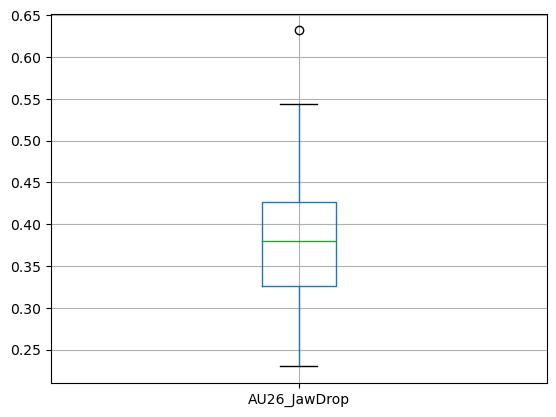

In [55]:
# df = apply_kalman_filter(df, 'headOrient_z')
# df[['headOrient_z', 'headOrient_z_kalman']].boxplot()

# df[['headOrient_z']].boxplot()

# for pp_id in range(len(split_df[0])): #LOOPs OVER PP NUMBER
#     for cond in [0,1]: #0-N/1-S
#         cond_df = split_df[pp_id][cond][1]
#         cond_df[['headOrient_z','headOrient_y']].boxplot()

split_df[0][0][1][['AU26_JawDrop']].boxplot()
plt.show()


In [52]:
for pp_id in range(len(split_df[0])): #LOOPs OVER PP NUMBER
    for cond in [0,1]: #0-N/1-S
        cond_df = split_df[pp_id][cond][1]
        for col in num_cols:
            cond_df = apply_kalman_filter(cond_df, col, replaceCol=True)

            #DID it work?

In [12]:
# #applying it to all num cols -NOT PP WISE SO WRONG
for col in df.select_dtypes(include='number').columns:
    df = apply_kalman_filter(df, col, replaceCol=True)
    

### Clustering


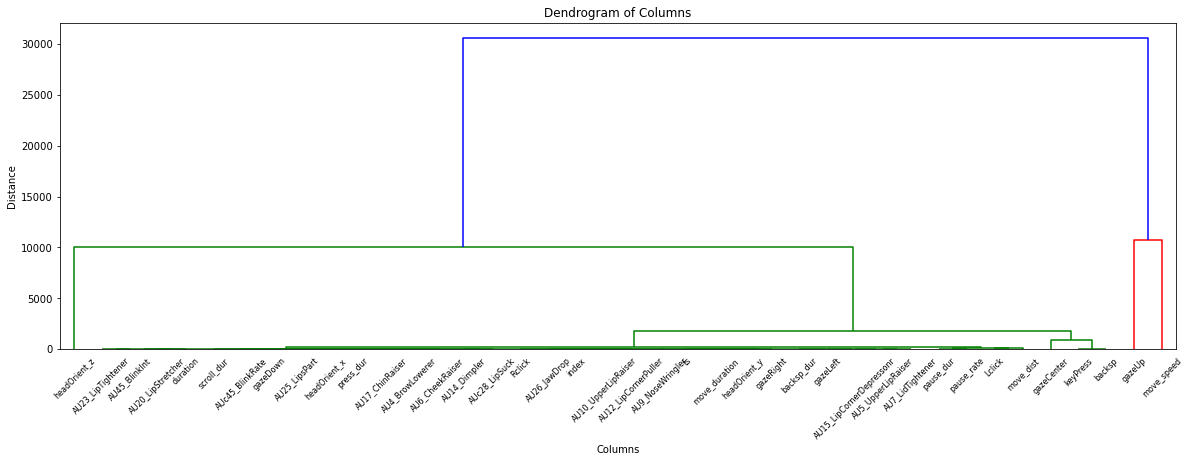

In [169]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Assuming your DataFrame is named 'df'
df_transposed = df[num_cols].transpose()  # Transpose the DataFrame to cluster columns instead of rows

# Perform agglomerative clustering
Z = linkage(df_transposed, method='ward')

# Plot the dendrogram
plt.figure(figsize=(20, 6))
dendrogram(Z, labels=df.columns, orientation='top')
plt.xlabel('Columns')
plt.ylabel('Distance')
plt.title('Dendrogram of Columns')
plt.show()


In [90]:
# for col in ['duration', 'move_dist', 'move_duration', 'move_speed', 'scroll_dur', 'press_dur', 'backsp_dur', 'pause_dur', 'pause_rate']:
#     df = interpolate_missing(df, col)

In [69]:
(pp_df[0][1])

,pp_id,condition,ts(sec),frame,success,confidence,AU1_InnerBrowRaiser,AU2_OuterBrowRaiser,AU4_BrowLowerer,AU5_UpperLipRaiser,...,move_dist,move_duration,move_speed,scroll_dur,keyPress,press_dur,backsp,backsp_dur,pause_dur,pause_rate
0,pp02,N,60.163,1800.0,1.000000,0.979333,0.124822,0.181006,0.251717,0.095600,...,5.659960,0.031436,703.808619,NaN,27.0,0.366753,27.0,0.037037,2.830594,4.717656
1,pp02,N,120.360,3600.0,1.000000,0.975500,0.100794,0.032833,0.130733,0.056844,...,15.594104,0.023057,1940.534010,NaN,105.0,0.263460,105.0,0.028000,0.564831,0.941385
2,pp02,N,180.556,5400.0,1.000000,0.975056,0.181544,0.064789,0.276167,0.064428,...,19.806823,0.023113,2461.080076,NaN,105.0,0.261484,105.0,0.028778,0.495433,0.825721
3,pp02,N,240.753,7200.0,1.000000,0.977056,0.174183,0.089906,0.139750,0.076000,...,5.370893,0.023799,664.848872,NaN,45.0,0.272449,45.0,0.099056,1.512937,2.521561
4,pp02,N,300.950,9000.0,1.000000,0.975194,0.141389,0.032494,0.236983,0.069117,...,NaN,NaN,NaN,NaN,131.0,0.318532,131.0,0.055815,0.417129,0.695215
5,pp02,N,361.146,10800.0,1.000000,0.979111,0.304111,0.209056,0.332311,0.038911,...,3.709111,0.031015,442.602537,NaN,50.0,0.607667,50.0,0.119661,1.318807,2.198012
6,pp02,N,421.343,12600.0,1.000000,0.980000,0.132000,0.048044,0.476739,0.073100,...,NaN,NaN,NaN,NaN,136.0,0.274610,136.0,0.028181,0.415943,0.693238
7,pp02,N,481.540,14400.0,1.000000,0.979667,0.137394,0.094850,0.085306,0.066806,...,NaN,NaN,NaN,NaN,124.0,0.297872,124.0,0.038144,0.500607,0.834344
8,pp02,N,541.736,16200.0,1.000000,0.977083,0.237961,0.069228,0.135583,0.043878,...,NaN,NaN,NaN,NaN,138.0,0.238314,138.0,0.009275,0.422777,0.704628
9,pp02,N,601.933,18000.0,1.000000,0.978667,0.188678,0.123306,0.257428,0.057800,...,9.125007,0.021711,1139.654514,NaN,137.0,0.273079,137.0,0.086068,0.459439,0.765732


In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'df' and 'pp' is the participant column
def interpolate_NAs(group):
    # Apply your custom function to interpolate NAs within each group
    # Modify this function according to your specific interpolation logic
    group['col_with_NAs'] = group['col_with_NAs'].interpolate(method='linear')
    return group

df_filled = df.groupby('pp').apply(interpolate_NAs)

print(df_filled)


# modeling

 ## making baseline, trying different models WO cv, tuning

### will work on df rn

In [13]:
from sklearn.model_selection import train_test_split ,cross_val_score,RandomizedSearchCV, cross_validate, StratifiedKFold
from sklearn.model_selection import GroupKFold
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score, recall_score, precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [115]:
df.columns

Index(['pp_id', 'condition', 'ts(sec)', 'frame', 'success', 'confidence',
       'AU1_InnerBrowRaiser', 'AU2_OuterBrowRaiser', 'AU4_BrowLowerer',
       'AU5_UpperLipRaiser', 'AU6_CheekRaiser', 'AU7_LidTightener',
       'AU9_NoseWringler', 'AU10_UpperLipRaiser', 'AU12_LipCornerPuller',
       'AU14_Dimpler', 'AU15_LipCornerDepressonr', 'AU17_ChinRaiser',
       'AU20_LipStretcher', 'AU23_LipTightener', 'AU25_LipsPart',
       'AU26_JawDrop', 'AU45_BlinkInt', 'AUc45_BlinkRate', 'AUc28_LipSuck',
       'headOrient_x', 'headOrient_y', 'headOrient_z', 'gazeCenter', 'gazeUp',
       'gazeDown', 'gazeRight', 'gazeLeft', 'index', 'ts', 'duration',
       'Rclick', 'Lclick', 'move_dist', 'move_duration', 'move_speed',
       'scroll_dur', 'keyPress', 'press_dur', 'backsp', 'backsp_dur',
       'pause_dur', 'pause_rate'],
      dtype='object')

In [14]:
def split_stratisfied_n_scale(df):
    df['stratCol'] = df['pp_id'].astype(str) + "_" + df['condition'].astype(str)

    X_train, X_test, y_train, y_test = train_test_split(df[num_cols], df['condition'], test_size=0.20, stratify=df['stratCol'], random_state=42)

    df.drop('stratCol', axis=1)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test
        

In [15]:
x_train, x_test, y_train, y_test = split_stratisfied_n_scale(df)

In [16]:
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(x_train, y_train)
y_pred = dummy_clf.predict(x_test)
# print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))


0.5


In [17]:
model = svm.SVC(kernel='rbf', random_state=42)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print('model used ' + str(model))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))


model used SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)
              precision    recall  f1-score   support

           N       0.89      1.00      0.94        24
           S       1.00      0.88      0.93        24

    accuracy                           0.94        48
   macro avg       0.94      0.94      0.94        48
weighted avg       0.94      0.94      0.94        48

0.9375


In [18]:
svm_simple = svm.SVC( random_state=42)

svm_simple.fit(x_train, y_train)

y_pred = svm_simple.predict(x_test)

print('model used ' + str(model))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

model used SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)
              precision    recall  f1-score   support

           N       0.89      1.00      0.94        24
           S       1.00      0.88      0.93        24

    accuracy                           0.94        48
   macro avg       0.94      0.94      0.94        48
weighted avg       0.94      0.94      0.94        48

0.9375


## running all models once

In [19]:
models = [svm.SVC( random_state=42), KNeighborsClassifier(), DecisionTreeClassifier(random_state=41), RandomForestClassifier(random_state=43)]
for model in models:
    
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    print('model used ' + str(model))
    print(classification_report(y_test, y_pred))
    print(accuracy_score(y_test, y_pred))

model used SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)
              precision    recall  f1-score   support

           N       0.89      1.00      0.94        24
           S       1.00      0.88      0.93        24

    accuracy                           0.94        48
   macro avg       0.94      0.94      0.94        48
weighted avg       0.94      0.94      0.94        48

0.9375
model used KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
              precision    recall  f1-score   support

           N       0.92      0.92      0.92        24
           S       0.92      0.92      0.92        24

    accuracy                           0.92  

## trying cv wi stratisfied NOT ON PPs k fold


In [20]:
x = df[num_cols] 
y = df['condition']

models = [svm.SVC( random_state=42), KNeighborsClassifier(), DecisionTreeClassifier(random_state=41), RandomForestClassifier(random_state=43)]

model = models[0]

skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42) 
lst_accu_stratified = []
for train_index, test_index in skf.split(x, y): 
    x_train_fold, x_test_fold = x.iloc[train_index, :], x.iloc[test_index, :] 
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    scaler = StandardScaler()
    x_train_fold_scaled = scaler.fit_transform(x_train_fold)
    x_test_fold_scaled = scaler.transform(x_test_fold)

    model.fit(x_train_fold_scaled, y_train_fold) 
    y_pred_fold = model.predict(x_test_fold_scaled)

    print('model used ' + str(model))
    print(classification_report(y_test_fold, y_pred_fold))
    print(accuracy_score(y_test_fold, y_pred_fold))

    # lst_accu_stratified.append(model.score(x_test_fold_scaled, y_test_fold))
    lst_accu_stratified.append(accuracy_score(y_test_fold, y_pred_fold))
    print('done once')

model used SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)
              precision    recall  f1-score   support

           N       0.92      0.97      0.94        60
           S       0.96      0.92      0.94        60

    accuracy                           0.94       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.94      0.94      0.94       120

0.9416666666666667
done once
model used SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)
              precision    recall  f1-score   support

           N       0.94      0.98      0.96        60
           S     

In [21]:
lst_accu_stratified

[0.9416666666666667, 0.9583333333333334]

In [13]:
for train_index, test_index in skf.split(x, y): 
    print(train_index)
    print(test_index)
    print('/n')
    

[  2   3   5   6   7   9  10  11  12  14  18  20  22  23  25  29  31  32
  33  35  38  39  40  44  47  48  51  53  55  57  58  59  63  65  66  67
  68  70  74  75  76  78  82  85  88  89  94  95  97  98  99 101 105 106
 110 111 112 115 116 118]
[  0   1   4   8  13  15  16  17  19  21  24  26  27  28  30  34  36  37
  41  42  43  45  46  49  50  52  54  56  60  61  62  64  69  71  72  73
  77  79  80  81  83  84  86  87  90  91  92  93  96 100 102 103 104 107
 108 109 113 114 117 119]
/n
[  0   1   4   8  13  15  16  17  19  21  24  26  27  28  30  34  36  37
  41  42  43  45  46  49  50  52  54  56  60  61  62  64  69  71  72  73
  77  79  80  81  83  84  86  87  90  91  92  93  96 100 102 103 104 107
 108 109 113 114 117 119]
[  2   3   5   6   7   9  10  11  12  14  18  20  22  23  25  29  31  32
  33  35  38  39  40  44  47  48  51  53  55  57  58  59  63  65  66  67
  68  70  74  75  76  78  82  85  88  89  94  95  97  98  99 101 105 106
 110 111 112 115 116 118]
/n


## trying GroupKfold splitting WO CV

https://www.kaggle.com/code/reighns/groupkfold-and-stratified-groupkfold-efficientnet

In [22]:
x = df[num_cols] 
y = df['condition']

models = [svm.SVC( random_state=42), KNeighborsClassifier(), DecisionTreeClassifier(random_state=41), RandomForestClassifier(random_state=43)]

model = models[0]

PPgroups = df['pp_id'].copy().tolist()

gkf = GroupKFold(n_splits = 2)

lst_accu_groups = []
for train_index, test_index in gkf.split(x, y, groups = PPgroups): 
    x_train_fold= x.iloc[train_index, :]
    x_test_fold= x.iloc[test_index, :] 
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    scaler = StandardScaler()
    x_train_fold_scaled = scaler.fit_transform(x_train_fold)
    x_test_fold_scaled = scaler.transform(x_test_fold)

    model.fit(x_train_fold_scaled, y_train_fold) 
    y_pred_fold = model.predict(x_test_fold_scaled)

    print('model used ' + str(model))
    print(classification_report(y_test_fold, y_pred_fold))
    print(accuracy_score(y_test_fold, y_pred_fold))

    # lst_accu_stratified.append(model.score(x_test_fold_scaled, y_test_fold))
    lst_accu_groups.append(accuracy_score(y_test_fold, y_pred_fold))
    print('done once')

model used SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)
              precision    recall  f1-score   support

           N       0.50      0.98      0.66        60
           S       0.50      0.02      0.03        60

    accuracy                           0.50       120
   macro avg       0.50      0.50      0.35       120
weighted avg       0.50      0.50      0.35       120

0.5
done once
model used SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)
              precision    recall  f1-score   support

           N       0.49      0.87      0.62        60
           S       0.38      0.0

In [15]:
x = df[num_cols] 
y = df['condition']

PPgroups = df['pp_id'].copy().tolist()

gkf = GroupKFold(n_splits = 2)

for train_index, test_index in gkf.split(x, y, groups = PPgroups): 
    print('a split:')
    print('train')
    print(set(df.iloc[train_index]['pp_id']))
    print('test')
    print(set(df.iloc[test_index]['pp_id'] ))

a split:
train
{'pp02'}
test
{'pp18'}
a split:
train
{'pp18'}
test
{'pp02'}


## trying  groupShuffleSplit splitting with CV (groupKfold) (no tuning) but first splitting to train and test, and the train goes in the cv

In [20]:

#figuring out how to split the dataset initially, to have the tain_df that will be thrown into cross val! - ignore

from sklearn.model_selection import GroupShuffleSplit

# Assuming 'df' is your DataFrame and 'pp' is the participant column
x = df[num_cols] 
y = df['condition']
groups = df['pp_id']  # Groups (participant column)

# Create an instance of GroupShuffleSplit with test_size and random_state
gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

    
# Split the data into training and testing sets
# train_indices, test_indices = next(gss.split(x, y, groups=groups))
# # Obtain the training and testing sets based on the indices
# X_train = x.iloc[train_indices]
# y_train = y.iloc[train_indices]
# X_test = x.iloc[test_indices]
# y_test = y.iloc[test_indices]
#checking the splits
for train_index, test_index in gss.split(x, y, groups = df['pp_id']): 
    print('a split:')
    print('train')
    print(set(df.iloc[train_index]['pp_id']))
    print((df.iloc[train_index]['pp_id']))
    print('test')
    # print(set(df.iloc[test_index]['pp_id'] ))
    print((df.iloc[test_index]['pp_id'] ))

In [25]:
from sklearn.model_selection import GroupShuffleSplit
x = df[num_cols] 
y = df['condition']

models = [svm.SVC( random_state=42), KNeighborsClassifier(), DecisionTreeClassifier(random_state=41), RandomForestClassifier(random_state=43)]

model = models[0]

PPgroups = df['pp_id'].copy().tolist()

#initial splitting
gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in gss.split(x, y, groups=PPgroups):
    print('a test-train split')
    x_train = x.iloc[train_index, :]
    x_test = x.iloc[test_index, :]
    y_train = y[train_index]
    y_test = y[test_index]
    pp_groups_trainOnly = df.iloc[train_index]['pp_id'] #will have one pp less than PPgroups!
    print('done splitting')

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

scores = cross_val_score(model, x_train_scaled, y_train, groups = pp_groups_trainOnly, cv=GroupKFold(n_splits=2))
print(model)
print('cross val scores: {}'.format(scores))


# gkf = GroupKFold(n_splits = 2) #splits should be less or equal than number of grups

# #need to splittrain and test ! and then trow the train_df into cv

# lst_accu_groups = []
# for train_index, test_index in gkf.split(x, y, groups = PPgroups): 
#     x_train_fold= x.iloc[train_index, :]
#     x_test_fold= x.iloc[test_index, :] 
#     y_train_fold, y_test_fold = y[train_index], y[test_index]

#     scaler = StandardScaler()
#     x_train_fold_scaled = scaler.fit_transform(x_train_fold)
#     x_test_fold_scaled = scaler.transform(x_test_fold)

#     model.fit(x_train_fold_scaled, y_train_fold) 
#     y_pred_fold = model.predict(x_test_fold_scaled)

#     print('model used ' + str(model))
#     print(classification_report(y_test_fold, y_pred_fold))
#     print(accuracy_score(y_test_fold, y_pred_fold))

#     # lst_accu_stratified.append(model.score(x_test_fold_scaled, y_test_fold))
#     lst_accu_groups.append(accuracy_score(y_test_fold, y_pred_fold))
#     print('done once')

a test-train split
done splitting
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)
cross val scores: [0.41666667 0.45      ]


## trying groupKfold splitting with random search CV

In [36]:
# i kinda fist have to split and standardise the test and train splitted, could play around with groupKfold and use only one fold? or define it manually by selecting one pp for test and the rest for thrain
#     x_train_fold_scaled = scaler.fit_transform(x_train_fold)
#     x_test_fold_scaled = scaler.transform(x_test_fold)

# #first need to standardize the train df (according to tutorial)
# scaler = StandardScaler()
# x_train_scaled = scaler.fit_transform(x_train)

# List of C values
C_range = np.logspace(-10, 10, 21)
# List of gamma values
gamma_range = np.logspace(-10, 10, 21)

# Define the search space
param_grid = { 
    # Regularization parameter.
    "C": C_range,
    # Kernel type
    "kernel": ['rbf', 'poly'],
    # Gamma is the Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
    "gamma": gamma_range.tolist()+['scale', 'auto']
    }
# Set up score
scoring = ['accuracy']

# Set up the k-fold cross-validation
gkfold = GroupKFold(n_splits = 2)

# Define random search
random_search = RandomizedSearchCV(estimator= svm.SVC( random_state=42), 
                           param_distributions=param_grid, 
                           n_iter=100,
                           scoring=scoring, 
                        #    refit='accuracy', 
                           n_jobs=-1, 
                           cv=gkfold, 
                           verbose=0,
                           random_state=42)

# Fit grid search
# random_result = random_search.fit(X_train_transformed, y_train) #WHERE DO THESE COME FROM